In [ ]:
# 2018580007 통계학과 김찬우

In [188]:
import numpy as np
import math

n = 50
theta = 0
x = np.array([np.random.logistic(theta, 1) for _ in range(n)])

### 미지의 모수 theta를 0으로 설정해주었습니다.

In [190]:
def f(_x, _theta):
    # return _theta**_x * np.exp(-_theta) / math.factorial(_x)
    return np.exp(-_x+_theta)/((1+np.exp(-_x+_theta))**2)

def g(_theta):
    # return 22/_theta - 4
    return n-2*np.sum([np.exp(-xi+_theta)/(1+np.exp(-xi+_theta)) for xi in x])

def dg(_theta):
    # return -22/(_theta**2)
    return -2*np.sum([np.exp(-xi+_theta)/((1+np.exp(-xi+_theta))**2) for xi in x])

g(1), dg(1)

(-12.702656498602082, -16.327065106060843)

### 관측된 값 $x$와 임의의 $\theta$로부터 f($x$;$\theta$), g($\theta$), g'($\theta$)를 구해줍니다.

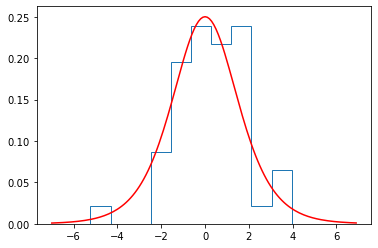

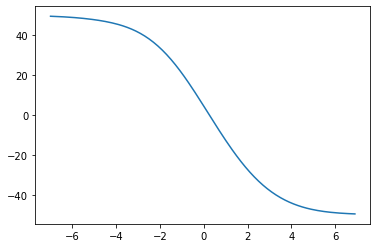

In [198]:
import matplotlib.pyplot as plt

plt.hist(x, density=True, histtype='step')
plt.plot([_*0.1 for _ in range(-70, 70)], [f(_x*0.1, theta) for _x in range(-70, 70)], color='r')    # theta = 0
plt.show()

plt.plot([_*0.1 for _ in range(-70, 70)], [g(_theta*0.1) for _theta in range(-70, 70)])    # theta = 0
plt.show()

### 히스토그램을 그려보면, 실제 분포와 유사한 모양을 확인할 수 있습니다. 이 때, g($\theta$)가 0이 되는 $\hat\theta$를 로지스틱분포의 가능도함수 L($\theta$)의 최대가능도추정값으로 볼 수 있습니다.

In [201]:
def next(_theta):
    return _theta-g(_theta)/dg(_theta)

max_iterator_num = 1000
def NewtonRaphson(_theta, iterator_num):
    y = g(_theta)
    print("y:", y)
    if(abs(y) < 1e-7 or iterator_num > max_iterator_num): return _theta
    return NewtonRaphson(next(_theta), iterator_num+1)

print('theta_hat:', NewtonRaphson(0, 0))

y: 4.443302335791188
y: -0.010000989661293147
y: 5.0340041468643903e-08
theta_hat: 0.25446242200170016


### 정확하지는 않지만 모수인 $\theta=0$과 가까운 최대가능도추정값 $\hat\theta$을 50개의 표본으로부터 구할 수 있습니다.